# Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
print("imorted")

imorted


# Loading Data

In [95]:
df = pd.read_csv("diabetes prediction/kaggle_diabetes.csv")

In [96]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

# Exploring Dataset

In [97]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

In [98]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [99]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


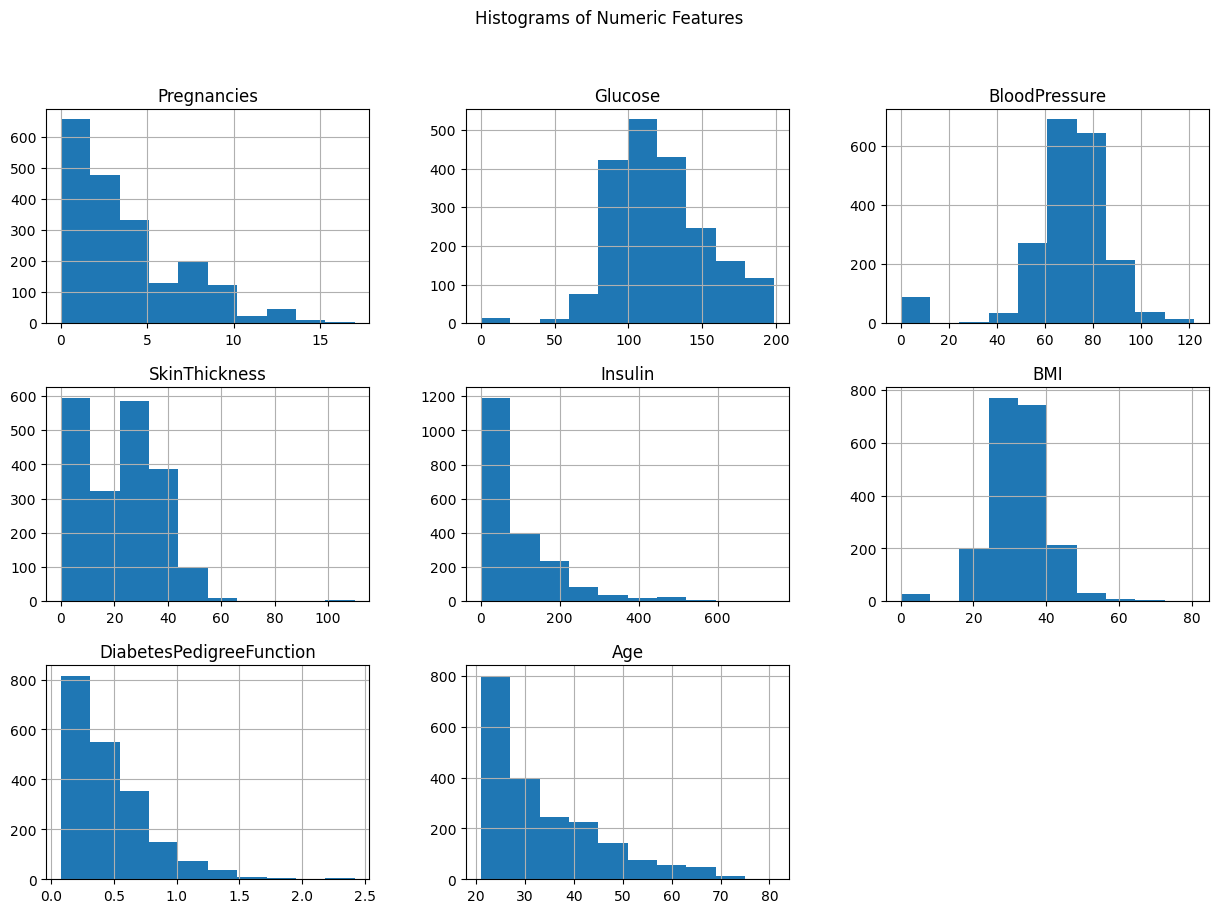

In [101]:
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numeric_features].hist(bins=10, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()


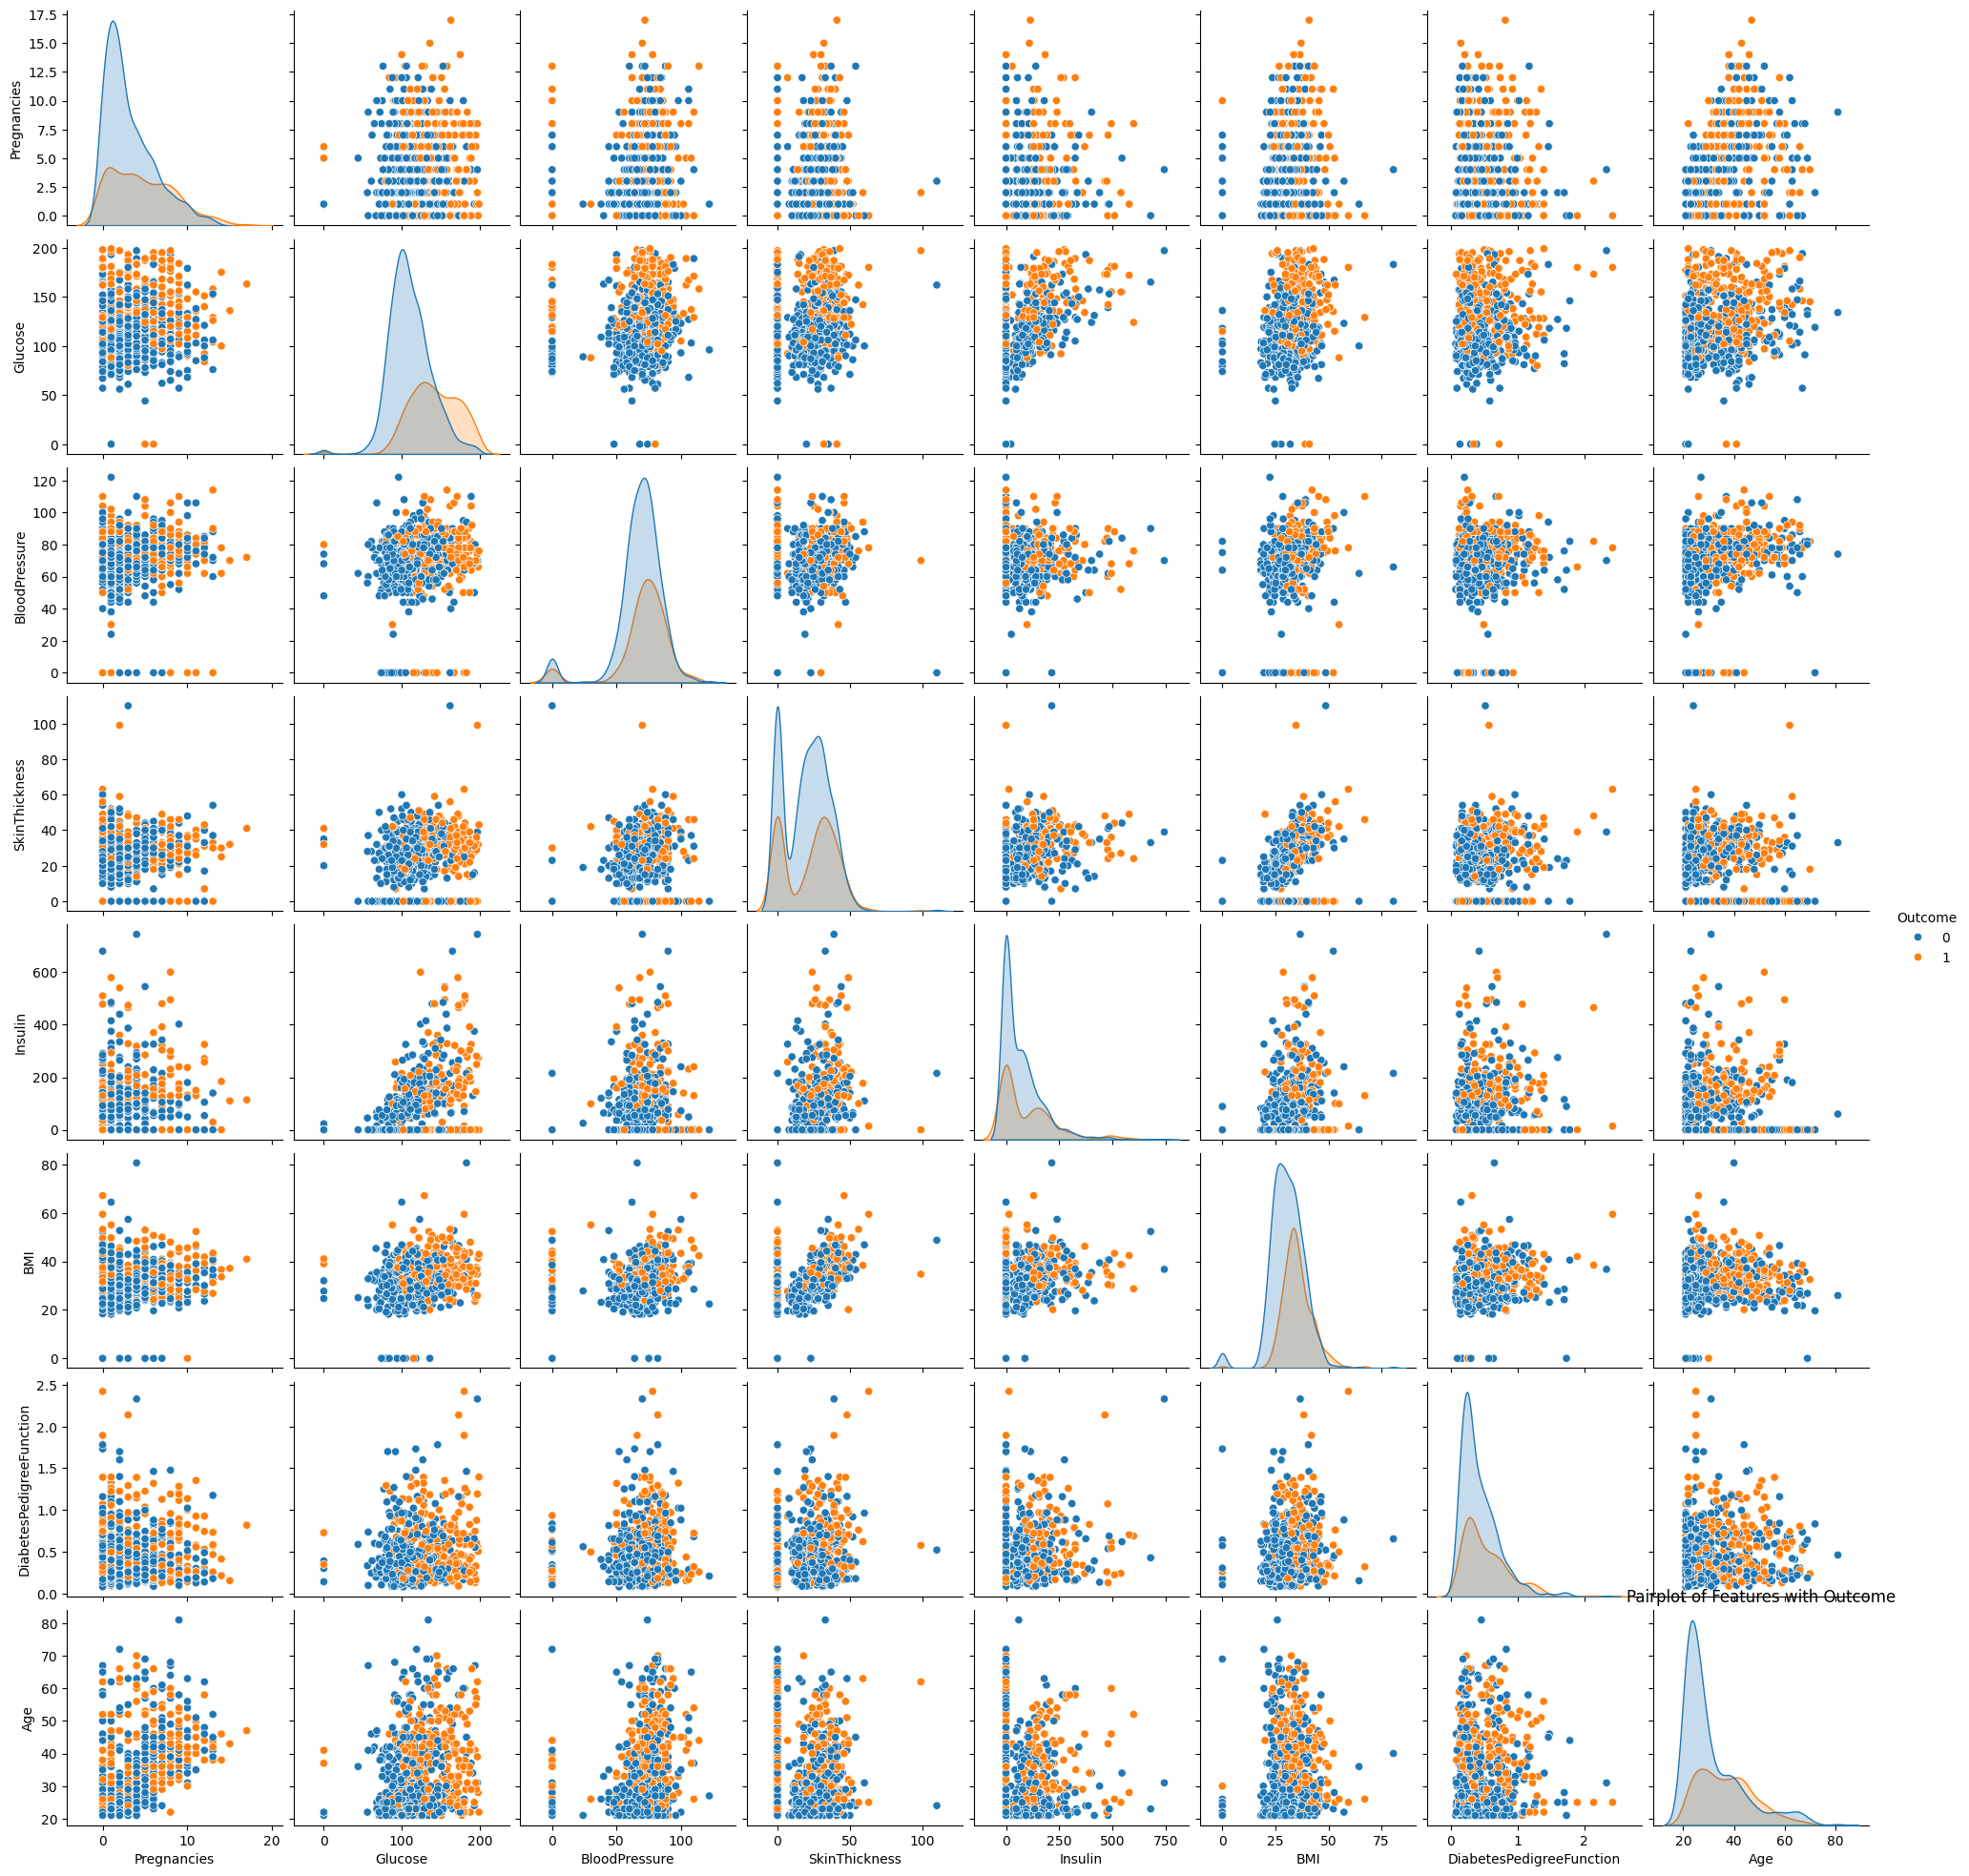

---


In [115]:
sns.pairplot(df, hue='Outcome')
plt.title("Pairplot of Features with Outcome")
plt.show()
print("---")


# Check Missing values

In [103]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Data Normalization using Min-Max Scaling


In [104]:
# Min-Max Scaling (Normalization to the range [0, 1])
min_max_scaler = MinMaxScaler()
df1 = min_max_scaler.fit_transform(df[['Pregnancies', 'Glucose',
                                       'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                                       'DiabetesPedigreeFunction', 'Age']])
df1= pd.DataFrame(df1, columns=['Pregnancies', 'Glucose', 'BloodPressure',
                                'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Print the first few rows of the normalized DataFrames
print("Min-Max Scaled Data:")
df1.head()
#print("\nStandardized Data:")
#df_normalized_standard.head()

Min-Max Scaled Data:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1     0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2     0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3     0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4     0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   

   DiabetesPedigreeFunction       Age  
0                  0.020922  0.433333  
1                  0.066183  0.033333  
2                  0.235696  0.166667  
3                  0.122545  0.050000  
4                  0.195559  0.000000

# Split Features (X) and Target Variable (y)


In [107]:
X = df1 # Exclude 'Id' and 'Outcome' columns
y = df['Outcome'] # Target variable is 'Outcome'

      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0        0.117647  0.693467       0.508197       0.318182  0.000000  0.416873   
1        0.000000  0.422111       0.672131       0.281818  0.168011  0.473945   
2        0.000000  0.728643       0.000000       0.000000  0.000000  0.548387   
3        0.000000  0.678392       0.557377       0.381818  0.336022  0.524814   
4        0.058824  0.698492       0.508197       0.372727  0.645161  0.504963   
...           ...       ...            ...            ...       ...       ...   
1995     0.117647  0.376884       0.524590       0.218182  0.073925  0.368486   
1996     0.470588  0.899497       0.590164       0.381818  0.174731  0.405707   
1997     0.352941  0.427136       0.639344       0.000000  0.000000  0.387097   
1998     0.000000  0.648241       0.901639       0.418182  0.174731  0.832506   
1999     0.117647  0.407035       0.590164       0.136364  0.102151  0.373449   

      DiabetesPedigreeFunct

# Train-Test Split


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [111]:
model = LogisticRegression()

In [112]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluate Logistic Regression Model


In [123]:
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')


Accuracy: 0.7825
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       253
           1       0.80      0.54      0.65       147

    accuracy                           0.78       400
   macro avg       0.79      0.73      0.75       400
weighted avg       0.79      0.78      0.77       400

[[233  20]
 [ 67  80]]
ROC-AUC Score: 0.7325831518378103


### `classification_report`

The `classification_report` is a function in the `sklearn.metrics` module that provides a detailed evaluation of a classification model's performance. It includes several important metrics for each class in a multi-class classification problem.

#### Metrics in `classification_report`

The `classification_report` includes the following metrics for each class:

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all instances the model predicted as positive, how many were actually positive?"
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]

- **Recall (Sensitivity or True Positive Rate)**: The ratio of correctly predicted positive observations to the all observations in the actual class. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?"
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]

- **F1-Score**: The weighted average of Precision and Recall. It is useful when you need a balance between Precision and Recall.
  \[
  \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]

- **Support**: The number of actual occurrences of the class in the dataset.

#### Example Usage

Here's how you might use the `classification_report` function:

```python
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


# Make predictions on the test data


In [124]:
 y_pred = model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


In [125]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [127]:
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

[[251   2]
 [  2 145]]
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

[[251   2]
 [  2 145]]


In [129]:
df['Predicted_Score'] = rf_classifier.predict(X)


In [130]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  Predicted_Score  
0                     0.127   47        1                1  
1                     0.233   23        0                0  
2                     0.630   31        1                1  
3                     0.365   24        1                1  
4                     0.536   21        0                0

In [131]:
correlation= df["Outcome"].corr(df['Predicted_Score'])
correlation

0.995556266552907